In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
plot_dir = plot_dir = '../../plots'

In [5]:
# read data
df = pd.read_csv("../../data/curated/individual_property_final.csv")

In [6]:
df.iloc[1]

Address                         8/90 Hambleton Street, Middle Park VIC 3206
Cost                                                             373.716814
Property Type                                                     Apartment
Bedrooms                                                                1.0
Bathrooms                                                               1.0
Latitude                                                         -37.847553
Longitude                                                        144.960477
Closest Gov Secondary School                            Albert Park College
Age under 20                                                           36.0
Age 20-39                                                              15.0
Age 40-59                                                              30.0
Age 60+                                                                19.0
Postcode                                                             3206.0
CBD Distance

# correlation heat map

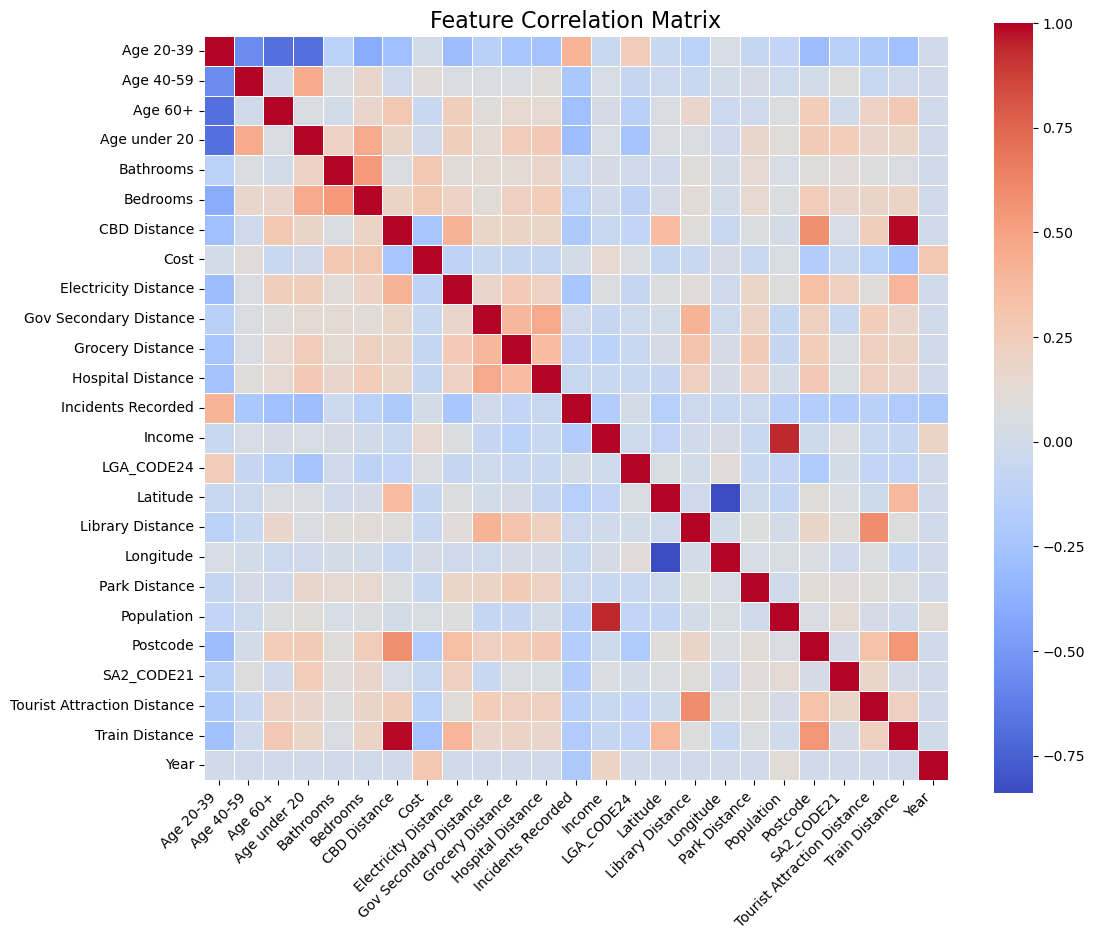

In [7]:
# Draw heat map to show the correlation matrix of numerical features in the domain dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(['Address', 'Property Type', 'Closest Gov Secondary School', 'Suburb'])

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True, square=True, linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


1. “Bedrooms”与“Bathrooms”的相关性较高，保留‘Bedrooms’
2. 考虑结合'school_distance'和“CBD Distance”和“Grocery Distance”来生成一个综合的“便利性”特征。

# income vs cbd distance(location) vs cost

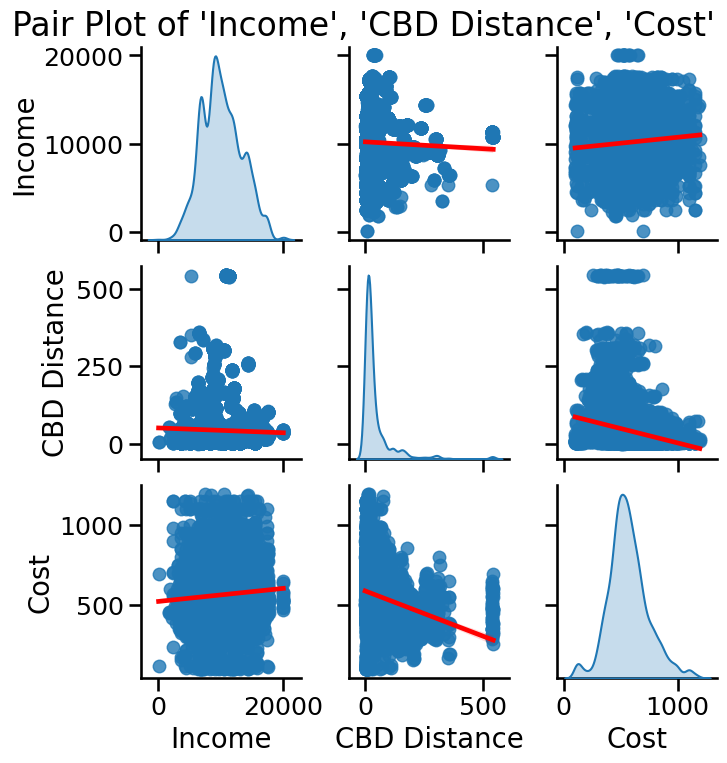

In [12]:
# Set the context for the plot
sns.set_context("talk", font_scale=1.1)

# Filter the dataframe for the year 2024
df_2024 = df[df['Year'] == 2024]

# Select relevant columns
pp_df = df_2024[['Income', 'CBD Distance', 'Cost']]

# Create a pairplot with regression lines and KDE for the diagonal
sns.pairplot(pp_df, kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}})

# Add a title
plt.suptitle("Pair Plot of 'Income', 'CBD Distance', 'Cost'", y=1.02)

# Display the plot
plt.show()

# Optional: Uncomment these lines to save the figure
# output_path = f"{plot_dir}/Pair_Plot_income_Age_CBD_Distance_Cost.png"
# plt.savefig(output_path, dpi=300, bbox_inches='tight')

The closer to the CBD, the higher the income and the higher the cost

# Cost VS Distance(location)

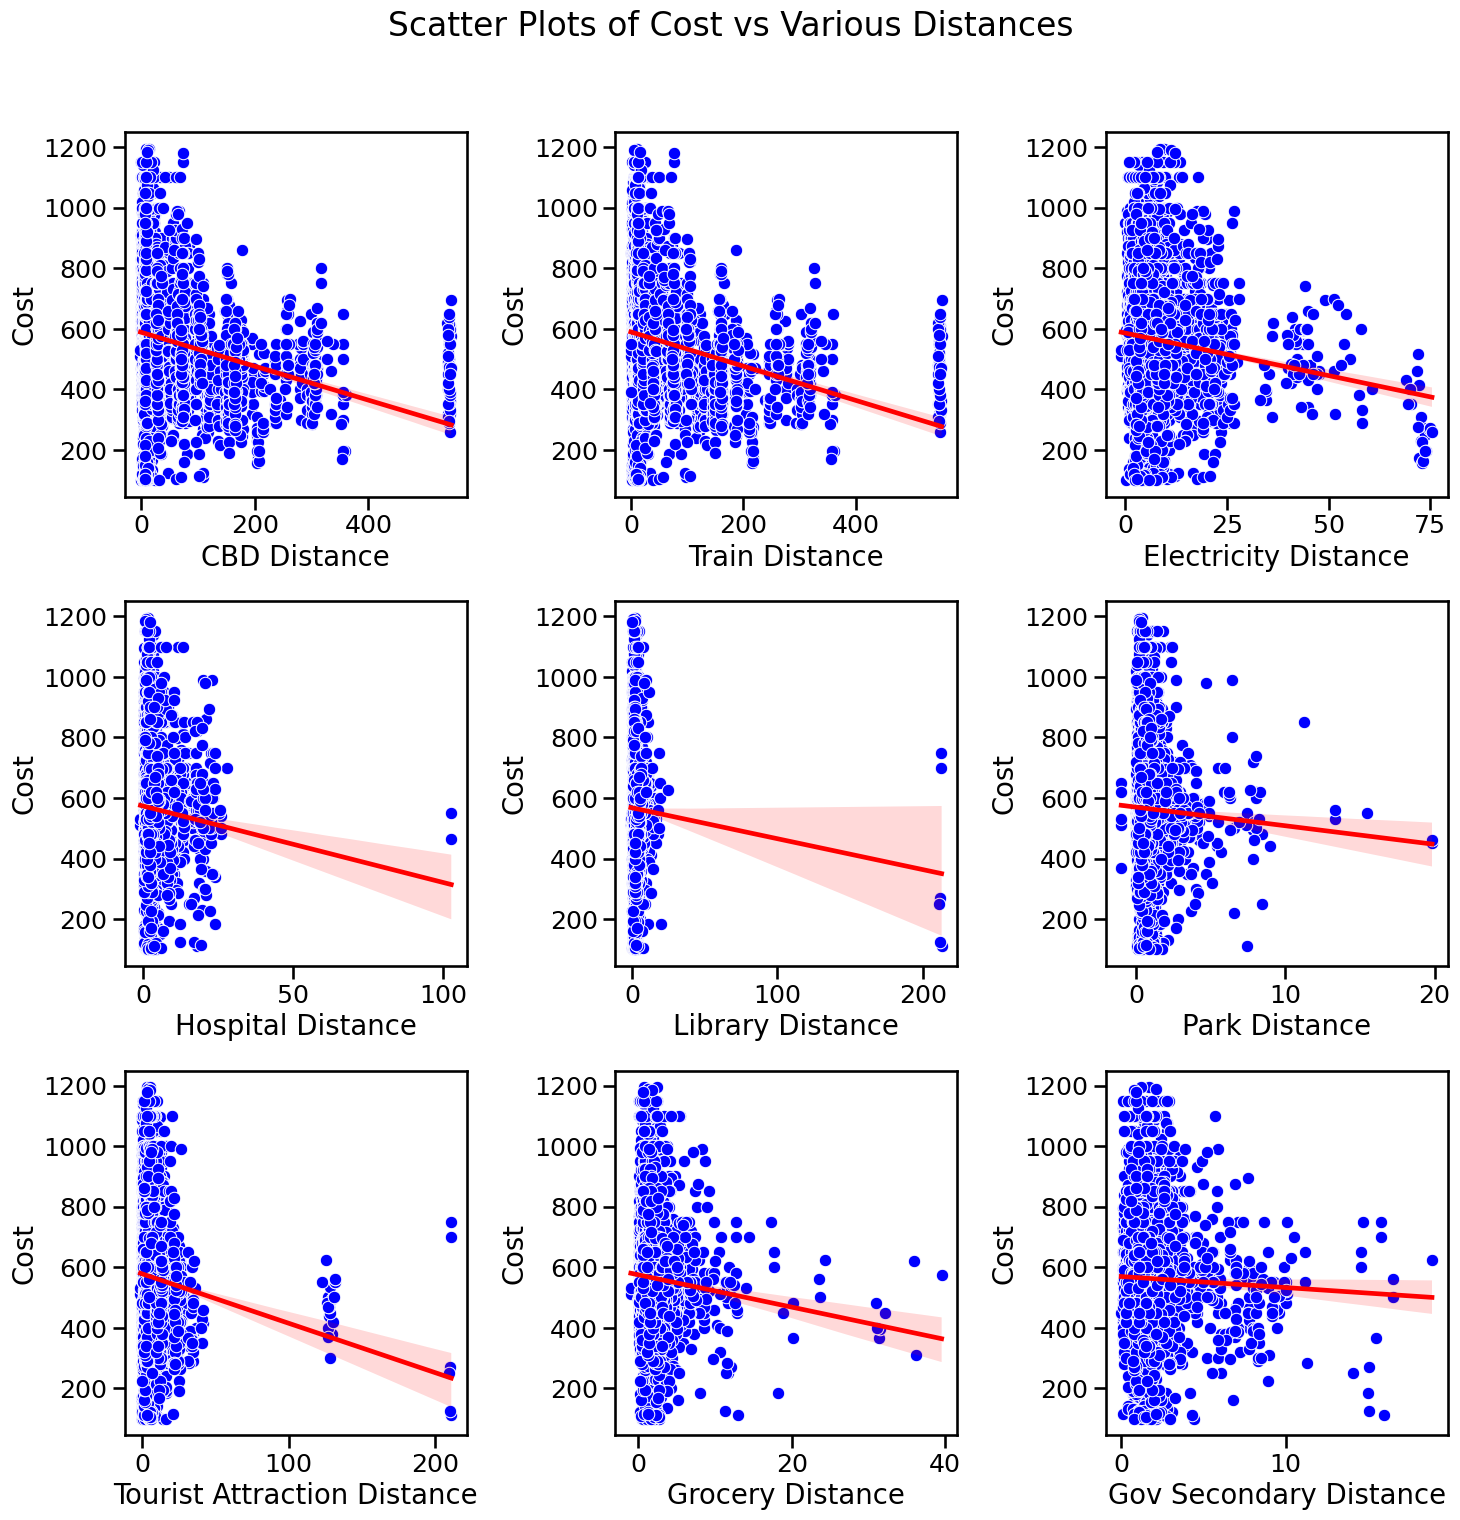

In [14]:
sns.set_context("talk", font_scale=1.1)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
cols = ['CBD Distance', 'Train Distance', 'Electricity Distance', 
        'Hospital Distance', 'Library Distance', 'Park Distance', 
        'Tourist Attraction Distance', 'Grocery Distance', 'Gov Secondary Distance']

for i, col in enumerate(cols):
    sns.scatterplot(x=col, y='Cost', data=df_2024, ax=axes[i//3, i%3], color='blue')
    sns.regplot(x=col, y='Cost', data=df_2024, ax=axes[i//3, i%3], scatter=False, color='red')

plt.suptitle('Scatter Plots of Cost vs Various Distances', y=1.02)
plt.tight_layout()
plt.show()


Closer, higher cost